In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import anndata as ad 


In [3]:
Cell_tagMulti_train = "/Users/apple/Desktop/KB/data/Cell_tag-Cell_tag_multi_integrated/Seurat_method/cell_tag_multi_train.h5ad"
Cell_tagMulti_test = "/Users/apple/Desktop/KB/data/Cell_tag-Cell_tag_multi_integrated/Seurat_method/cell_tag_multi_test.h5ad"
# load once
adata_Cell_Multi_train = ad.read_h5ad(Cell_tagMulti_train)
adata_Cell_Multi_test = ad.read_h5ad(Cell_tagMulti_test)

In [4]:
adata_Cell_Multi_train.obs["clone_id"]

B4D21-RNA-r2-4_TACAACGTCGCTAAAC-1    57120.0
B4D21-RNA-r2-1_ACACTGATCTCACCCA-1    57120.0
B4D21-RNA-r2-1_AGATAGAAGGTCATTC-1    57120.0
B4D21-RNA-r2-2_TTTGATCTCCGGCTTT-1    57120.0
B4D21-RNA-r2-3_TGGGCTGTCTAGACCA-1    57120.0
                                      ...   
B4D21-RNA-r2-2_CTACCTGCATGGATCT-1    46395.0
B4D21-RNA-r2-2_GGTGAAGTCGAGCCAC-1    46395.0
B4D21-RNA-r2-2_GTTGCTCAGATGTTGA-1    46395.0
B4D21-RNA-r2-2_TCAATTCAGCGTGCCT-1    46395.0
B4D21-RNA-r2-2_TTACGCCCACGATAGG-1    46395.0
Name: clone_id, Length: 20251, dtype: float64

In [14]:
embed_path = "/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi"

train_embed_001 = np.load(embed_path + "/feat_celltagMulti_only_lambda001_unlab25_bs250_testAsPenalty/train_embed.npy")
test_embed_001 = np.load(embed_path + "/feat_celltagMulti_only_lambda001_unlab25_bs250_testAsPenalty/test_embed.npy")

train_embed_001_10 = np.load(embed_path + "/feat_celltagMulti_only_lambda001_unlab10_bs250_testAsPenalty/train_embed.npy")
test_embed_001_10 = np.load(embed_path + "/feat_celltagMulti_only_lambda001_unlab10_bs250_testAsPenalty/test_embed.npy")

In [8]:
total_elements = train_embed_001.size
non_zero = np.count_nonzero(train_embed_001)

total_elements, non_zero

(1296064, 576793)

In [ ]:
train_norm = train_embed_01 / np.linalg.norm(train_embed_01, axis=1, keepdims=True)
test_norm = test_embed_01 / np.linalg.norm(test_embed_01, axis=1, keepdims=True)

In [9]:
def plot_top5_umap(emb, labels, title, n_neighbors=15, min_dist=0.3, random_state=42):
    """
    emb: np.ndarray (n_cells, n_features) – your high-dim embeddings
    labels: 1D array-like of clone_id (ints or floats; NaN/-1 treated as 'other')
    """
    labels = pd.Series(labels).copy()

    # Treat missing as 'other'
    # If you already use -1 for unlabeled, this preserves it.
    labels_clean = labels.copy()
    labels_clean = labels_clean.where(~labels_clean.isna(), -1)

    # Top-5 clone_ids by count, excluding unlabeled (-1)
    top_ids = (
        labels_clean[labels_clean != -1]
        .value_counts()
        .head(5)
        .index.tolist()
    )

    # 2D UMAP
    reducer = umap.UMAP(
        n_neighbors=n_neighbors, 
        min_dist=min_dist, 
        metric='euclidean', 
        random_state=random_state
    )
    emb2d = reducer.fit_transform(emb)

    # Masks
    is_top = labels_clean.isin(top_ids)
    is_other = ~is_top

    # Plot
    plt.figure(figsize=(7, 6))
    # Background first: gray
    plt.scatter(
        emb2d[is_other, 0], emb2d[is_other, 1],
        c="lightgray", s=6, alpha=0.5, linewidths=0, label="other"
    )

    # Use default matplotlib color cycle for the 5 groups
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, cid in enumerate(top_ids):
        mask = labels_clean == cid
        plt.scatter(
            emb2d[mask, 0], emb2d[mask, 1],
            s=10, alpha=0.9, linewidths=0,
            label=f"clone_id {cid}",
            c=color_cycle[i % len(color_cycle)]
        )

    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.legend(markerscale=1.2, frameon=True, fontsize=9)
    plt.tight_layout()
    plt.show()



In [10]:
adata_Cell_Multi__train_labels = adata_Cell_Multi_train.obs["clone_id"].to_numpy()  # keep user’s dtype; NaN ok
adata_Cell_Multi_test_labels  = adata_Cell_Multi_test.obs["clone_id"].to_numpy()



/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


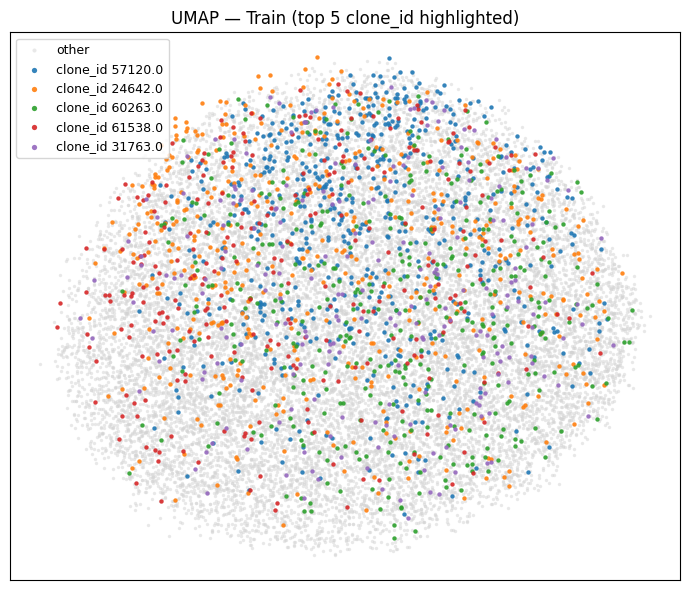

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


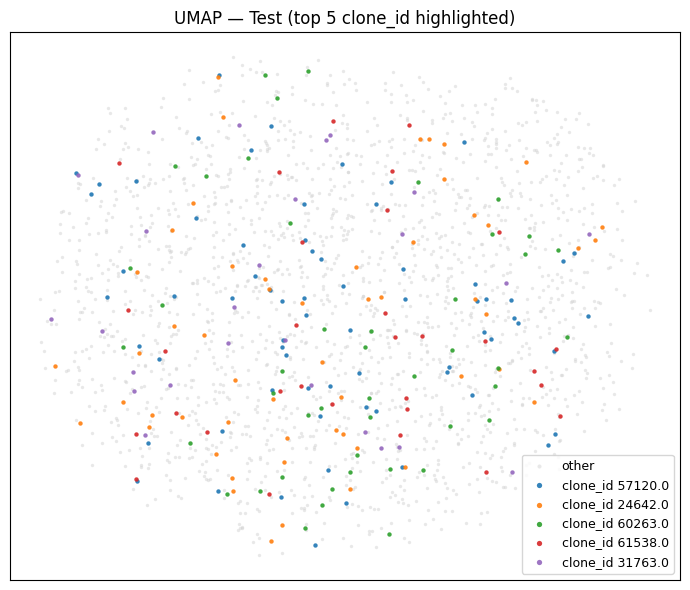

In [11]:
plot_top5_umap(train_embed_001, adata_Cell_Multi__train_labels, title="UMAP — Train (top 5 clone_id highlighted)")
plot_top5_umap(test_embed_001,  adata_Cell_Multi_test_labels,  title="UMAP — Test (top 5 clone_id highlighted)")

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


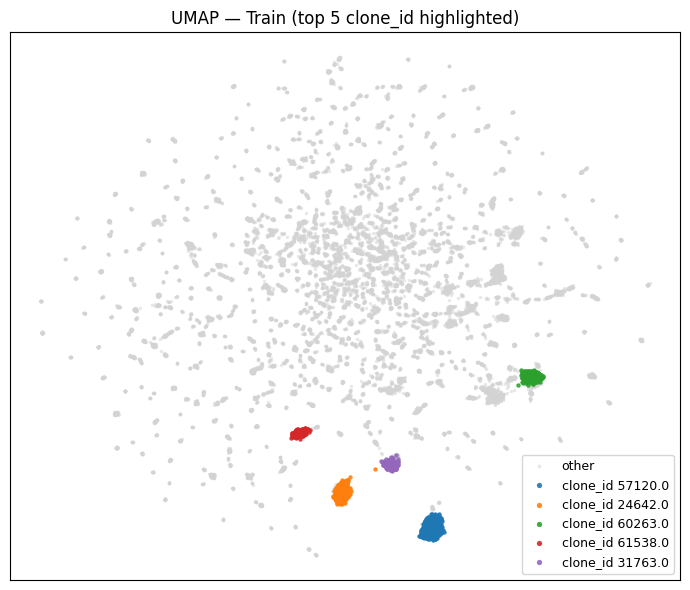

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


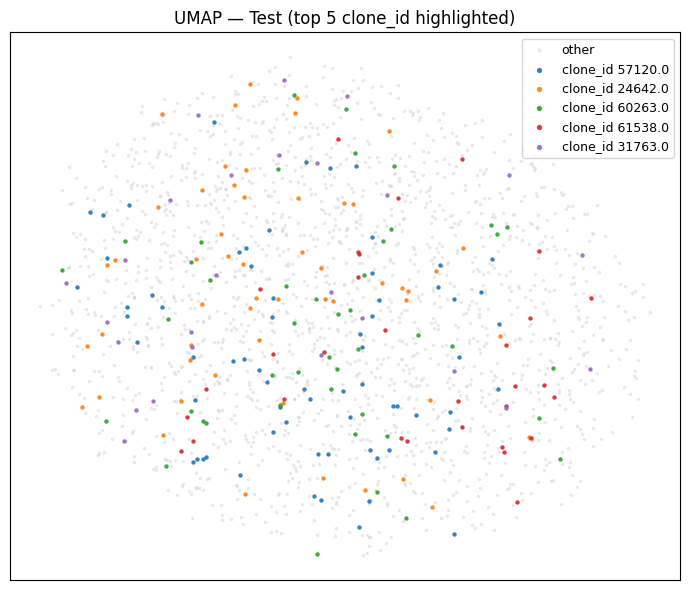

In [15]:
plot_top5_umap(train_embed_001_10, adata_Cell_Multi__train_labels, title="UMAP — Train (top 5 clone_id highlighted)")
plot_top5_umap(test_embed_001_10,  adata_Cell_Multi_test_labels,  title="UMAP — Test (top 5 clone_id highlighted)")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import umap

def plot_train_test_umap(train_emb, test_emb, n_neighbors=15, min_dist=0.3, random_state=42):
    """
    Concatenate train & test embeddings, run UMAP, and color by 'train'/'test'.
    Ensures train points are plotted on top of test points.
    """
    # 1) Combine embeddings
    emb_combined = np.vstack([train_emb, test_emb])

    # 2) Create labels
    split_labels = np.array(
        ["train"] * train_emb.shape[0] + ["test"] * test_emb.shape[0]
    )

    # 3) Run UMAP
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric='euclidean',
        random_state=random_state
    )
    emb2d = reducer.fit_transform(emb_combined)

    # 4) Plot — plot 'test' first, then 'train'
    plt.figure(figsize=(7, 6))

    # plot test first (bottom layer)
    mask_test = split_labels == "test"
    plt.scatter(
        emb2d[mask_test, 0], emb2d[mask_test, 1],
        c="tab:orange", label="test", s=8, alpha=0.8
    )

    # plot train second (top layer)
    mask_train = split_labels == "train"
    plt.scatter(
        emb2d[mask_train, 0], emb2d[mask_train, 1],
        c="tab:blue", label="train", s=8, alpha=0.8
    )

    plt.title("UMAP — Train on Top of Test")
    plt.xticks([]); plt.yticks([])
    plt.legend(markerscale=1.5, frameon=True)
    plt.tight_layout()
    plt.show()

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


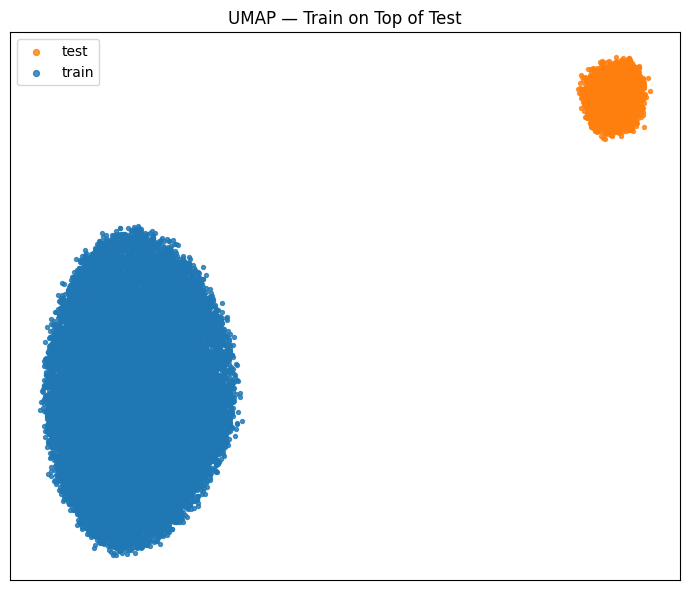

In [13]:
plot_train_test_umap(train_embed_001, test_embed_001)

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


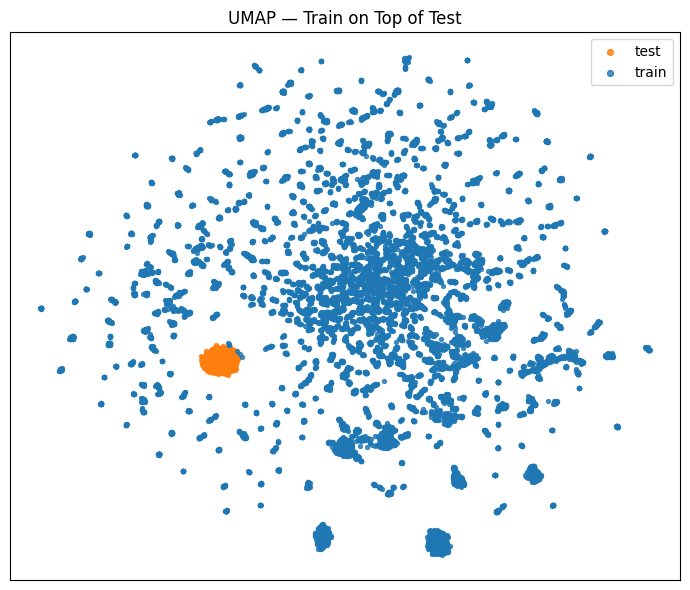

In [16]:
plot_train_test_umap(train_embed_001_10, test_embed_001_10)

In [14]:
train_loss_5 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab5_bs250_testAsPenalty/train_losses_bs250_tau0.5.npy")
val_loss_5 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab5_bs250_testAsPenalty/val_losses_bs250_tau0.5.npy")

train_loss_15 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab15_bs250_testAsPenalty/train_losses_bs250_tau0.5.npy")
val_loss_15 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab15_bs250_testAsPenalty/val_losses_bs250_tau0.5.npy")

train_loss_25 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab25_bs250_testAsPenalty/train_losses_bs250_tau0.5.npy")
val_loss_25 = np.load(embed_path + "/feat_celltagMulti_lambda001_unlab25_bs250_testAsPenalty/val_losses_bs250_tau0.5.npy")

In [15]:
def plot_train_val_loss(train_loss, val_loss, 
                        train_label="Train Loss", 
                        val_label="Validation Loss", 
                        title="Training vs Validation Loss"):
    
    plt.figure(figsize=(8,5))
    plt.plot(train_loss, label=train_label, linewidth=2)
    plt.plot(val_loss, label=val_label, linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

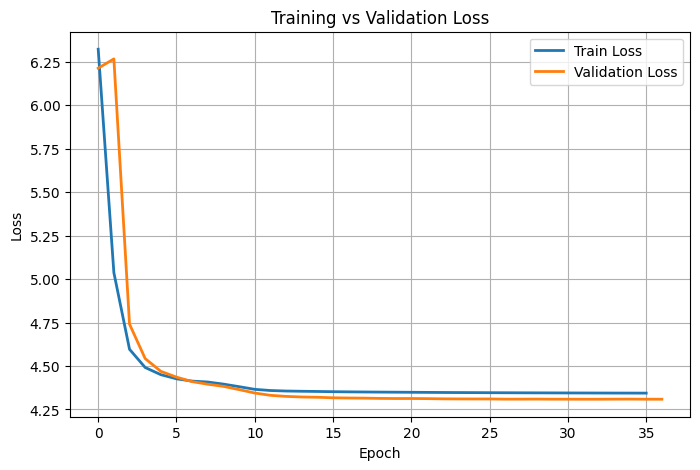

In [16]:
plot_train_val_loss(train_loss_5, val_loss_5)

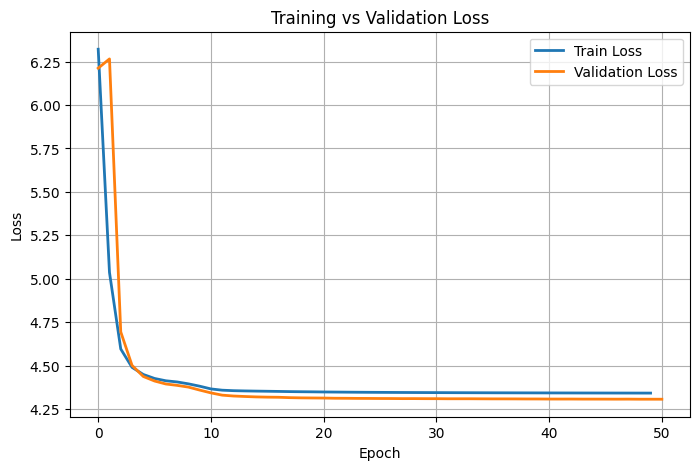

In [17]:
plot_train_val_loss(train_loss_15, val_loss_15)

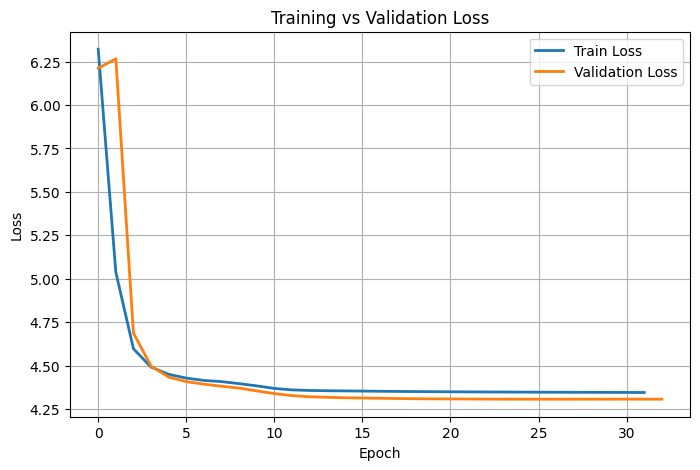

In [18]:
plot_train_val_loss(train_loss_25, val_loss_25)